In [86]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

%matplotlib widget

np.set_printoptions(precision=2, suppress=True, threshold=5)

In [87]:
L = np.array([
    [-150, 150, 0],
    [300, 0, 0],
])

Q = np.cumsum(L, axis=0)
print(f"Q: {Q}")

W = np.array([
    [0, 0, 1],
    [0, 0, 1]
])
print(f"W: {W}")

V = -np.cross(W, Q)
print(f"V: {V}")

M = np.array([
    [1, 0, 0, 350],
    [0, 1, 0, 150],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

S = np.zeros((len(L), 4, 4))
for i in range(len(L)):
    S[i] = np.array([
        [0, -W[i][2], W[i][1], V[i][0]],
        [W[i][2], 0, -W[i][0], V[i][1]],
        [-W[i][1], W[i][0], 0, V[i][2]],
        [0, 0, 0, 0]
        
    ])
print(f"S: {S}")

Q: [[-150  150    0]
 [ 150  150    0]]
W: [[0 0 1]
 [0 0 1]]
V: [[ 150  150    0]
 [ 150 -150    0]]
S: [[[   0.   -1.    0.  150.]
  [   1.    0.    0.  150.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[   0.   -1.    0.  150.]
  [   1.    0.    0. -150.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]]


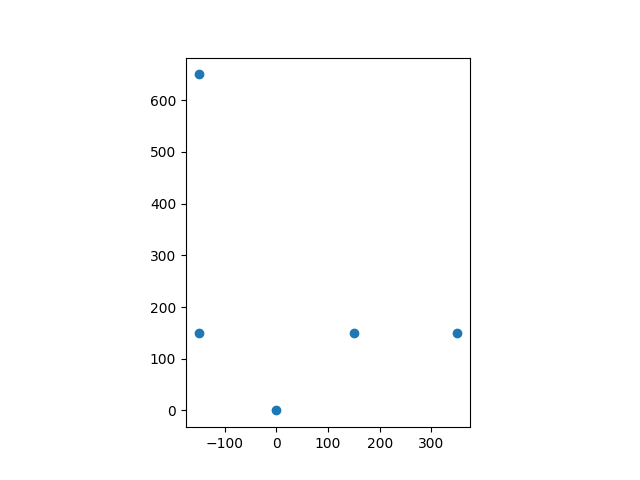

In [92]:
thetas = np.radians(np.array([90, 0]))

T = np.zeros((len(L), 4, 4))
for i in range(len(L)):
    T[i] = expm(S[i]*thetas[i])
# print(f"T: {T}")

T_M = M
for i in range(len(L)):
    T_M = T[i] @ T_M
# print(f"T_M: {T_M}")

xplot = np.array([0, Q[0][0], Q[1][0], M[0][3], T_M[0][3]])
yplot = np.array([0, Q[0][1], Q[1][1], M[1][3], T_M[1][3]])

ax = plt.figure().add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(xplot, yplot)
